# EV Car Prices

This assignment focuses on car prices. The data ('car_prices.xlsx') is a pre-processed version of original data scraped from bilbasen.dk by previous MAL1 students. The dataset contains 16 columns:

- **Price (DKK)**: The current listed price of the vehicle in Danish Kroner.
- **Model Year**: The manufacturing year of the vehicle.
- **Mileage (km)**: The total kilometres driven by the vehicle (odometer reading).
- **Electric Range (km)**: The estimated maximum driving range on a full charge.
- **Battery Capacity (kWh)**: The total capacity of the vehicle's battery in kilowatt-hours.
- **Energy Consumption (Wh/km)**: The vehicle's energy consumption in watt-hours per kilometre.
- **Annual Road Tax (DKK)**: The annual road tax cost in Danish Kroner.
- **Horsepower (bhp)**: The vehicle's horsepower (brake horsepower).
- **0-100 km/h (s)**: The time (in seconds) for the car to accelerate from 0 to 100 km/h.
- **Top Speed (km/h)**: The maximum speed the vehicle can achieve.
- **Towing Capacity (kg)**: The maximum weight the vehicle can tow.
- **Original Price (DKK)**: The price of the vehicle when first sold as new.
- **Number of Doors**: The total number of doors on the vehicle.
- **Rear-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for rear-wheel drive.
- **All-Wheel Drive (AWD)**: A binary indicator (1 = Yes, 0 = No) for all-wheel drive.
- **Front-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for front-wheel drive.

The first one, **Price**, is the response variable.

The **objective** of this assignment is:
1. Understand how linear algebra is used in Machine Learning, specifically for correlations and regression
2. Learn how to perform multiple linear regression, ridge regression, lasso regression and elastic net
3. Learn how to assess regression models

Please solve the tasks using this notebook as you template, i.e. insert code blocks and markdown block to this notebook and hand it in. Please use 42 as your random seed.


## Import data
 - Import the dataset 
 - Split the data in a training set and test set - make sure you extract the response variable
 - Remember to use the data appropriately; in the tasks below, we do not explicitly state when to use train and test - but in order to compare the models, you must use the same dataset for training and testing in all models.
 - Output: When you are done with this, you should have the following sets: `X` (the original dataset), `X_train`, `X_train`, `X_test`, `y_train`, `y_test`

In [16]:
# Code block for important and creating data sets. Add more code blocks if needed.
import pandas as pd
from sklearn.model_selection import train_test_split

# load the data
data = pd.read_excel("car_prices.xlsx")

# drop one dummy column (reference category)
data = data.drop(columns=["Rear-Wheel Drive"])

y = data["Price (DKK)"].to_numpy()
X = data.drop(columns=["Price (DKK)", "Original Price (DKK)"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((4980, 13), (1246, 13))

## Part 1: Linear Algebra
In this assignment, you have to solve all problems using linear algebra concepts. You are free to use SymPy or NumPy - though NumPy is **significantly** more efficient computationally than SymPy since NumPy is optimized for numerical computations with floating-point arithmetic. Since linear regression is purely numerical, NumPy is the better choice.


### Task 1: Regression



Linear regression finds the best-fitting line (or hyperplane) by solving for the **coefficient vector** $\mathbf{B}$ that minimizes the squared error:

$$
\mathbf{B} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

where:
- $\mathbf{X}$ is the **design matrix**, including a column of ones for the intercept.
- $\mathbf{y}$ is the **response variable** (target values).
- $\mathbf{B}$ contains the **regression coefficients**.

**Explanation of Each Step**
1. **Construct the matrix $X$**:
   - Each **row** represents a data point.
   - Each **column** represents a feature.
   - The **first column is all ones** to account for the **intercept**.

2. **Solve for $\mathbf{B}$ using the normal equation**:
   - Compute $X^T X$ (feature correlation).
   - Compute $X^T y$ (cross-product with the target variable).
   - Compute the **inverse of $X^T X$** and multiply by $X^T y$ to get $\mathbf{B}$.

3. **Interpret the results**:
   - The **first value** in $\mathbf{B}$ is the **intercept**.
   - The remaining values are the **coefficients for each feature**.



In [17]:
# Use this for Task 3. Add more code blocks if needed.
import numpy as np

np.set_printoptions(suppress=True)
dm = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
dm_trans = dm.transpose()

feature_correlation = dm_trans @ dm
cross_product = dm_trans @ y_train
feature_correlation_inv = np.linalg.inv(feature_correlation)

coefs = feature_correlation_inv @ cross_product

B = coefs[0]

coefs = coefs[1:]

coefs

array([ 11963.20634842,     -0.91000778,    223.73083015,    532.31732325,
         2366.30762225,   -105.06637693,    501.46734286,  14314.44266614,
          993.20365653,      1.03643409, -10858.06851502, -26052.18950814,
       -15897.39688389])

Task 2: Evaluating the Model

Once we have the regression coefficients $\mathbf{B}$, we can evaluate how well the model fits the data using two key metrics:

1. **Mean Squared Error (MSE)** – Measures the average squared difference between the predicted and actual values:
   $$
   MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$
   - Lower MSE means better fit.

2. **$R^2$ (Coefficient of Determination)** – Measures how much of the variance in $y$ is explained by $X$:
   $$
   R^2 = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2}
   $$
   - $R^2$ ranges from **0 to 1**, where **1** indicates a perfect fit and **0** means the model explains no variance.


**Explanation of Each Step**
1. **Compute Predictions**:  
   $$ \hat{y} = X B $$
   This gives the model’s predicted values.

2. **Compute MSE**:  
   - We square the residuals $ (y - \hat{y})^2 $ and take the mean.

3. **Compute $R^2$**:
   - **Total sum of squares** $ SS_{total} $ measures the total variance in $ y $.
   - **Residual sum of squares** $ SS_{residual} $ measures the variance left unexplained by the model.
   - $ R^2 $ tells us what fraction of variance is explained.

**Interpreting the Results**
- **MSE**: Lower values indicate a better fit.
- **$R^2$ Score**:
  - **$R^2 = 1$** → Perfect fit (all points on the regression line).
  - **$R^2 = 0$** → Model is no better than predicting the mean of $ y $.
  - **$R^2 < 0$** → Model performs worse than a simple average.

Implement the above steps using linear algebra so that you both create a regression model and calculate the MSE and $R^2$. Note, here you need to use `X_train`, `X_test`, `y_train` and `y_test` appropriately!


In [18]:
dm_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train.to_numpy()), axis=1)
dm_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test.to_numpy()), axis=1)

beta_full = np.concatenate(([B], coefs))

y_pred_train = dm_train @ beta_full
y_pred_test = dm_test @ beta_full

mse_train = np.mean((y_train - y_pred_train) ** 2)
mse_test = np.mean((y_test - y_pred_test) ** 2)

ss_res_train = np.sum((y_train - y_pred_train) ** 2)
ss_tot_train = np.sum((y_train - y_train.mean()) ** 2)
r2_train = 1 - ss_res_train / ss_tot_train

ss_res_test = np.sum((y_test - y_pred_test) ** 2)
ss_tot_test = np.sum((y_test - y_test.mean()) ** 2)
r2_test = 1 - ss_res_test / ss_tot_test

print(f"Train MSE: {mse_train:.2f}, Train R²: {r2_train:.4f}")
print(f"Test  MSE: {mse_test:.2f}, Test  R²: {r2_test:.4f}")

Train MSE: 7593335730.84, Train R²: 0.6574
Test  MSE: 7494423858.38, Test  R²: 0.6338


# Part 2: Using Library Functions

### Task 4: Correlation and OLS
For this task you must do the following
 - Using library functions, build the following models:
   - Correlation matrix where the correlations are printed in the matrix and a heat map is overlaid
   - Ordinary least squares
   - Performance metrics: MSE, RMSE, $R^2$
   - Comment on the real world meaning of RMSE and $R^2$


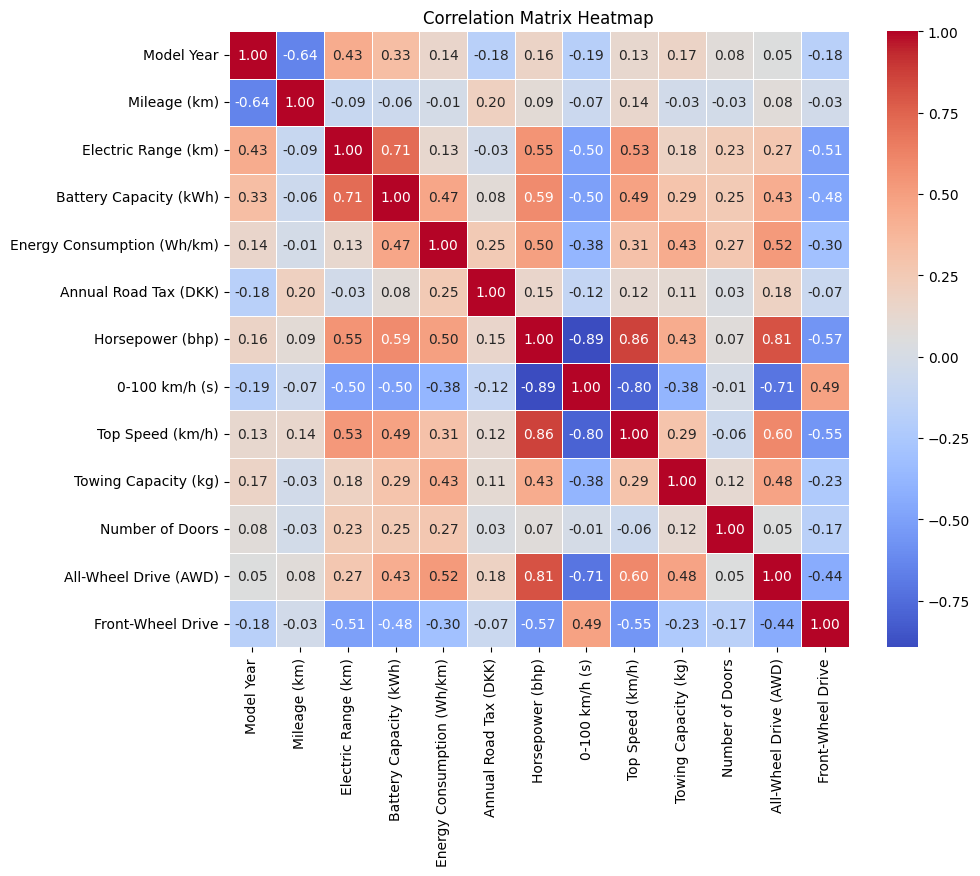

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f"Train MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}")
print(f"R^2 on train data from sklearn is {model.score(X_train, y_train)}")
print(f"R^2 on test data from sklearn is {model.score(X_train, y_train)}");

Train MSE: 7593335730.84, RMSE: 87139.75
Test MSE: 7494423858.09, RMSE: 86570.34
R^2 on train data from sklearn is 0.6573812407205162
R^2 on test data from sklearn is 0.6573812407205162


- RMSE = “How much are we off, in the same unit as the prediction?”
- R² = “How much of the real-world pattern did we capture?”

### Task 5: Ridge, Lasso and Elastic Net
In order for Ridge and Lasso (and Elastic net) to have an effect, you must use scaled data to build the models, since regularization depends on coefficient magnitude, and if using non-scaled data the penalty will affect them unequally. Feel free to use this code to scale the data:

```python
# Standardize X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()
```
For the final task you must do the following
   - Ridge regression (using multiple alphas)
   - Lasso regression (using multiple alphas)
   - Elastic Net (using multiple alphas)
 - Discussion and conclusion:
   - Discuss the MSE and $R^2$ of all 3 models and conclude which model has the best performance - note the MSE will be scaled!
   - Rebuild the OLS model from Task 4, but this time use the scaled data from this task - interpret the meaning of the model's coefficients
   - Use the coefficients of the best ridge and lasso model to print the 5 most important features and compare to the 5 most important features in the OLS with scaled data model. Do the models agree about which features are the most important?

Note: You may get a convergence warning; try increasing the `max_iter` parameter of the model (the default is 1000 - maybe set it to 100000)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score


scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_Y = StandardScaler()
y_train_scaled = scaler_Y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_Y.transform(y_test.reshape(-1, 1))


def universal_model_test(model_type, X_train, y_train, X_test, y_test, alphas=None):
    mse_list = []
    r2_list = []
    models = []

    if alphas:
        for alpha in alphas:
            model = model_type(alpha=alpha)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            mse_list.append(mse)
            r2_list.append(r2)
            models.append(model)
            print(f"{model_type.__name__} (alpha={alpha}): MSE = {mse:.2f}, R² = {r2:.4f}")
        return models, mse_list, r2_list
    else:
        model = model_type()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"OLS (scaled): MSE = {mse:.2f}, R² = {r2:.4f}")
        return model



alphas = [0.01, 0.1, 1.0, 10.0]

ridge_models, ridge_mses, ridge_r_squares = universal_model_test(
    Ridge, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, alphas
)

lasso_models, lasso_mses, lasso_r_squares = universal_model_test(
    Lasso, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, alphas
)

elastic_net_models, elastic_net_mses, elastic_net_r_squares = universal_model_test(
    ElasticNet, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, alphas
)

ols_model_scaled = universal_model_test(
    LinearRegression, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled
)

Ridge (alpha=0.01): MSE = 0.34, R² = 0.6338
Ridge (alpha=0.1): MSE = 0.34, R² = 0.6338
Ridge (alpha=1.0): MSE = 0.34, R² = 0.6338
Ridge (alpha=10.0): MSE = 0.34, R² = 0.6341
Lasso (alpha=0.01): MSE = 0.34, R² = 0.6348
Lasso (alpha=0.1): MSE = 0.36, R² = 0.6113
Lasso (alpha=1.0): MSE = 0.92, R² = -0.0008
Lasso (alpha=10.0): MSE = 0.92, R² = -0.0008
ElasticNet (alpha=0.01): MSE = 0.34, R² = 0.6356
ElasticNet (alpha=0.1): MSE = 0.34, R² = 0.6295
ElasticNet (alpha=1.0): MSE = 0.77, R² = 0.1633
ElasticNet (alpha=10.0): MSE = 0.92, R² = -0.0008
OLS (scaled): MSE = 0.34, R² = 0.6338


In [22]:
best_ridge_model = ridge_models[np.argmin(ridge_mses)]
best_lasso_model = lasso_models[np.argmin(lasso_mses)]
best_elastic_net_model = elastic_net_models[np.argmin(elastic_net_mses)]

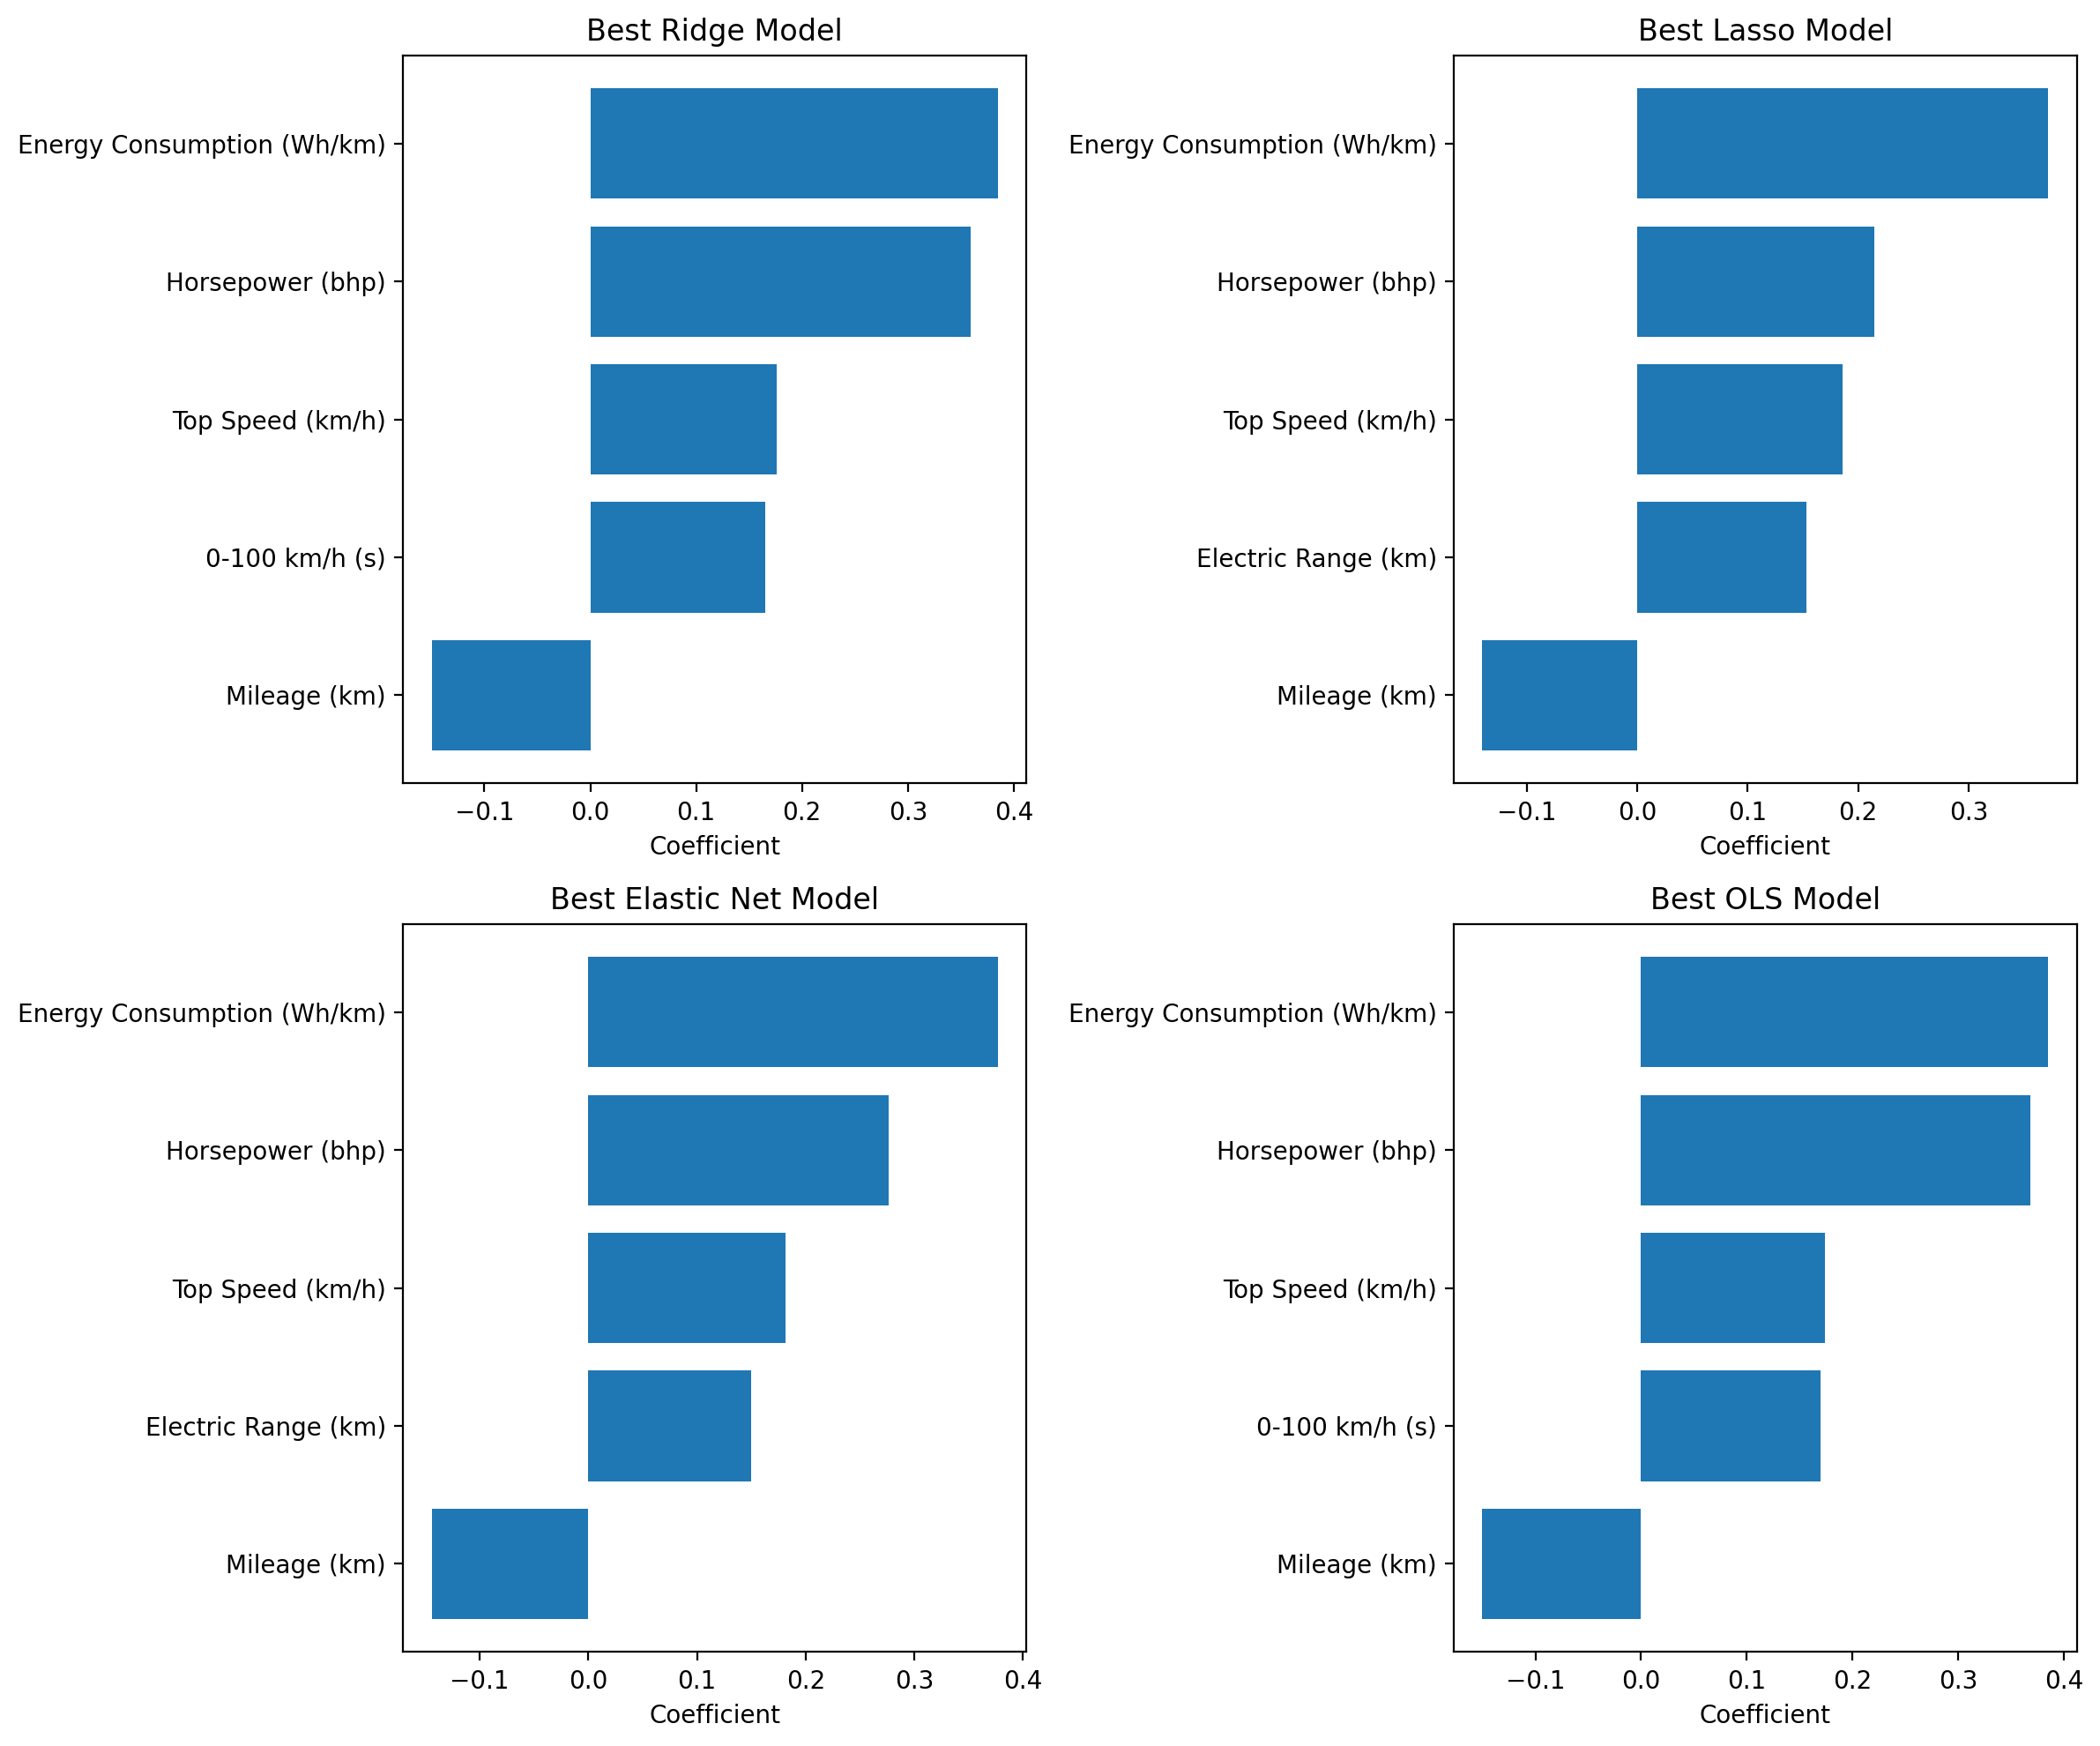

In [ ]:

import matplotlib.pyplot as plt

models = [
    best_ridge_model,
    best_lasso_model,
    best_elastic_net_model,
    ols_model_scaled
]
titles = [
    "Best Ridge Model",
    "Best Lasso Model",
    "Best Elastic Net Model",
    "Best OLS Model"
]

# 2×2 grid, each subplot shows its own top‐5 features
fig, axes = plt.subplots(2, 2, figsize=(12, 10), dpi=200)
axes = axes.flatten()

for ax, model, title in zip(axes, models, titles):
    coefs = model.coef_.flatten() if hasattr(model, "coef_") else np.squeeze(model.coef_)
    top_idx = np.argsort(np.abs(coefs))[::-1][:5]
    top_coefs = coefs[top_idx][::-1]
    top_feats = X.columns[top_idx][::-1]

    ax.barh(range(len(top_feats)), top_coefs)
    ax.set_yticks(range(len(top_feats)))
    ax.set_yticklabels(top_feats)
    ax.set_title(title)
    ax.set_xlabel("Coefficient")

plt.tight_layout()
plt.show()
# ...existing code...